# Работа с Excel

In [ ]:
pip install xlwings

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.2 MB 15.8 MB/s 


In [ ]:
import xlwings as xw
import numpy as np
import pandas as pd

Материалы:
* Макрушин С.В. Лекция 7: Работа с Excel
* https://docs.xlwings.org/en/stable/quickstart.html
* https://nbviewer.jupyter.org/github/pybokeh/jupyter_notebooks/blob/master/xlwings/Excel_Formatting.ipynb#search_text


## Задачи для совместного разбора

In [5]:
# from openpyxl import Workbook, load_workbook
import openpyxl as xl
import numpy as np

# edit workbook
wb = xl.load_workbook("sebestoimostA_v1.xlsx")
ws = wb.active
lst_sum = []
dict = {}
for cellObj in ws['D7':'O10']:
    for cell in cellObj:
        lst_sum.append(cell.value)
    dict[ws['C'+str(cellObj[0].coordinate[1:])].value] = np.nansum(np.array(lst_sum, dtype=float))
    lst_sum = []
dict

{'Хлеб Венгерский': 86.15499999999999,
 'Хлеб "Барбари"': 68.76499999999999,
 'Багет парижский': 85.689,
 'Чиабатта': 85.675}

In [6]:
import openpyxl.styles as xlst


ws['P5'] = 'Себестоимость всех продуктов'
ws['P5'].font = xlst.Font(name='Calibri', size=11, color='FFFFFF', bold=True)
dict_val = list(dict.values())
for cellObj in ws['P7':'P10']:
    for cell in cellObj:
        ws[cell.coordinate] = dict_val[int(cell.coordinate[1:])-7]
        ws[cell.coordinate].font = xlst.Font(name='Calibri', size=11, color='000000')

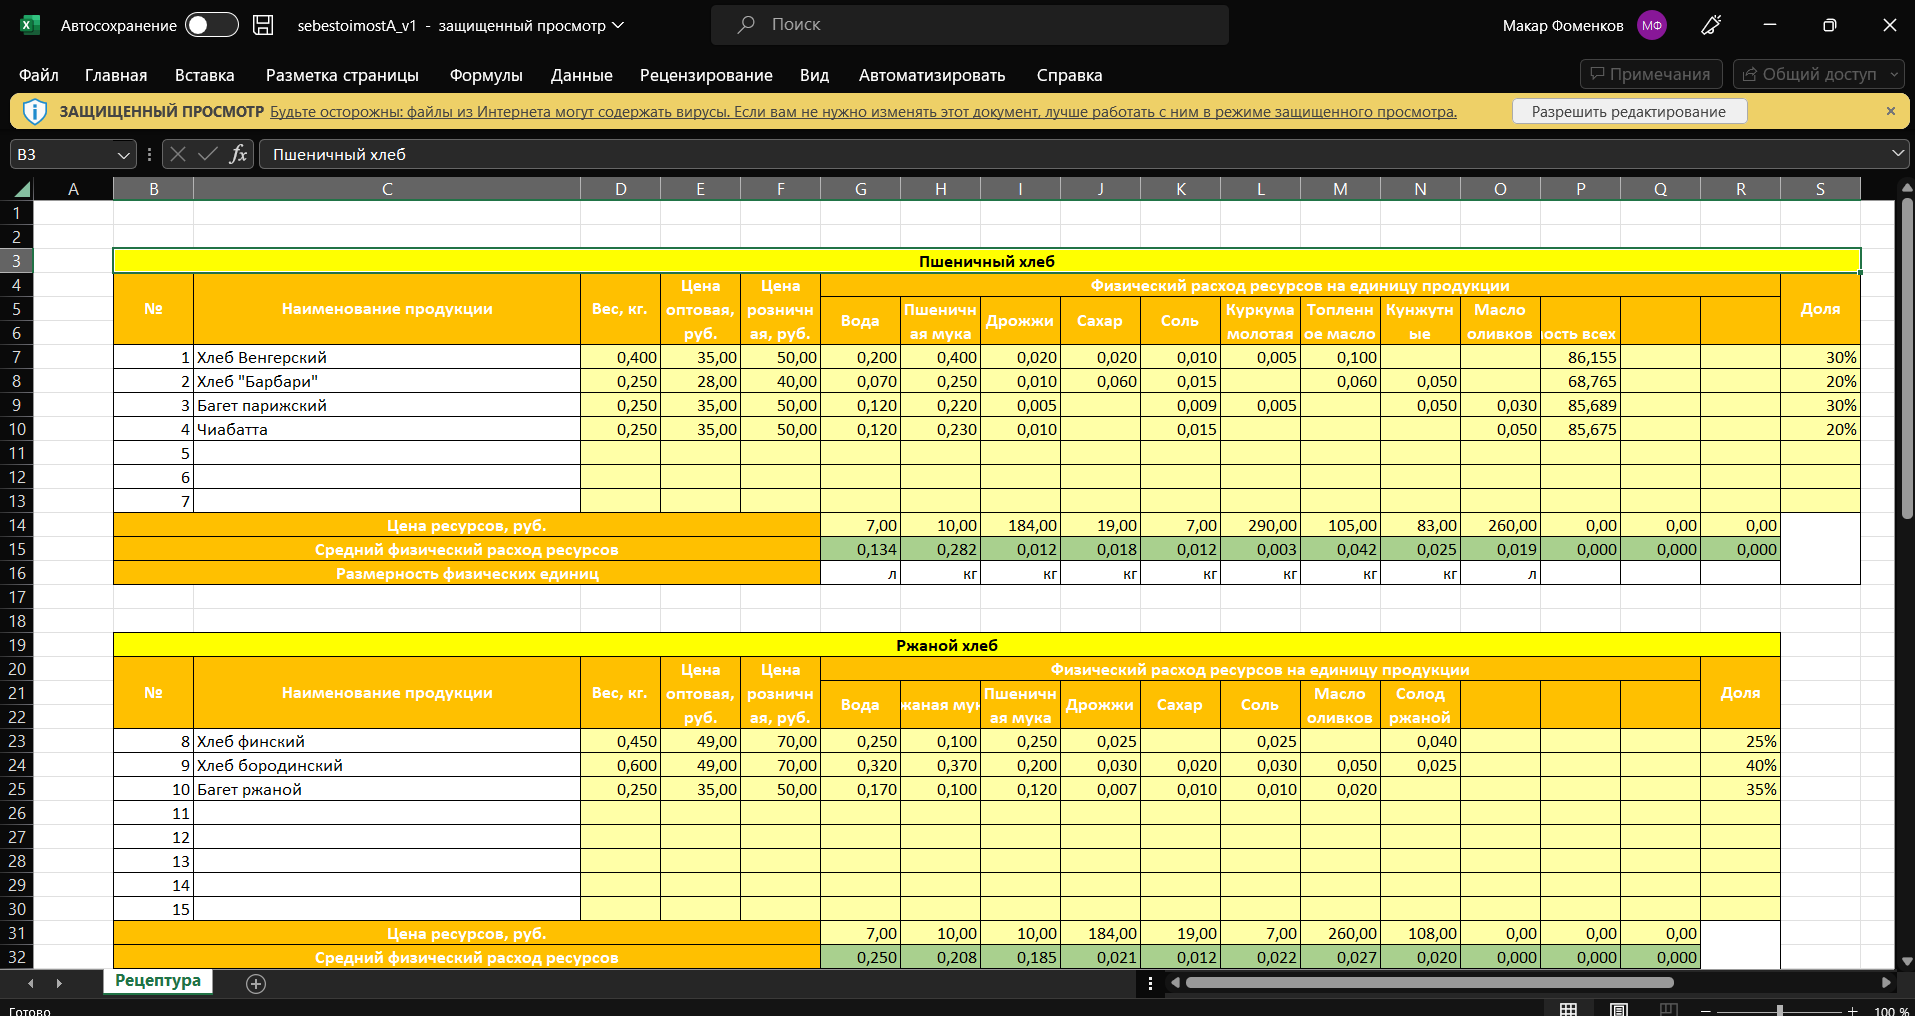